In [11]:
#here goes nothing

#woof

#let's see what i get

In [12]:
# lets start with a simple model of the structure of mars:

import numpy as np
import matplotlib.pyplot as plt

r_mars = 3390  # Mars' radius in km

# Defining the data for Mars layers
layer_data_mars = [
    {"Layer": "Crust", "Radius (km)": 3390, "Depth (km)": 0, "P-wave velocity (km/s)": 4.25, "S-wave velocity (km/s)": 2.5,
     "Temperature (K)": 213.15, "Mineral Composition": "iron, magnesium, aluminum, calcium, potassium",
     "Thermal Gradient (K/km)": 25, "Thermal conductivity (W/m/K)": 158.2, "Density (g/cm^3)": 2.9},
    {"Layer": "Crust-Mantle Boundary", "Radius (km)": 3340, "Depth (km)": 50, "P-wave velocity (km/s)": None,
     "S-wave velocity (km/s)": None, "Temperature (K)": 1400, "Mineral Composition": "-", "Thermal Gradient (K/km)": 0,
     "Thermal conductivity (W/m/K)": None, "Density (g/cm^3)": None},
    {"Layer": "Mantle", "Radius (km)": 1830, "Depth (km)": 1560, "P-wave velocity (km/s)": 5, "S-wave velocity (km/s)": 4,
     "Temperature (K)": 1500, "Mineral Composition": "silicon, oxygen, iron, magnesium", "Thermal Gradient (K/km)": 2,
     "Thermal conductivity (W/m/K)": 96.5, "Density (g/cm^3)": 3.4},
    {"Layer": "Core-Mantle Boundary", "Radius (km)": 1830, "Depth (km)": 1560, "P-wave velocity (km/s)": None,
     "S-wave velocity (km/s)": None, "Temperature (K)": 1900, "Mineral Composition": "-", "Thermal Gradient (K/km)": 0,
     "Thermal conductivity (W/m/K)": None, "Density (g/cm^3)": None},
    {"Layer": "Core", "Radius (km)": 0, "Depth (km)": 3390, "P-wave velocity (km/s)": 6, "S-wave velocity (km/s)": 0,
     "Temperature (K)": 2000, "Mineral Composition": "Iron, nickel, 16–17% sulfur", "Thermal Gradient (K/km)": 0.5,
     "Thermal conductivity (W/m/K)": 56.7, "Density (g/cm^3)": 6}
]

vp_values = [layer['P-wave velocity (km/s)'] for layer in layer_data_mars if layer['P-wave velocity (km/s)'] is not None]
vs_values = [layer['S-wave velocity (km/s)'] for layer in layer_data_mars if layer['S-wave velocity (km/s)'] is not None]
radii = [layer['Radius (km)'] for layer in layer_data_mars if layer['P-wave velocity (km/s)'] is not None]
depth = [layer['Depth (km)'] for layer in layer_data_mars if layer['P-wave velocity (km/s)'] is not None]

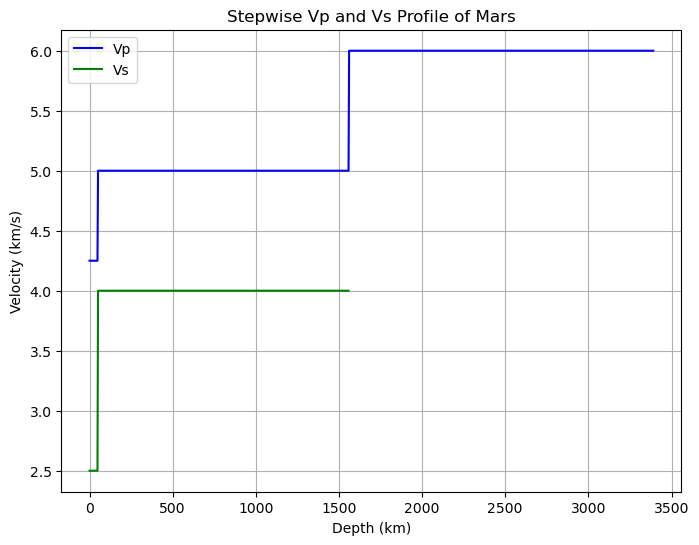

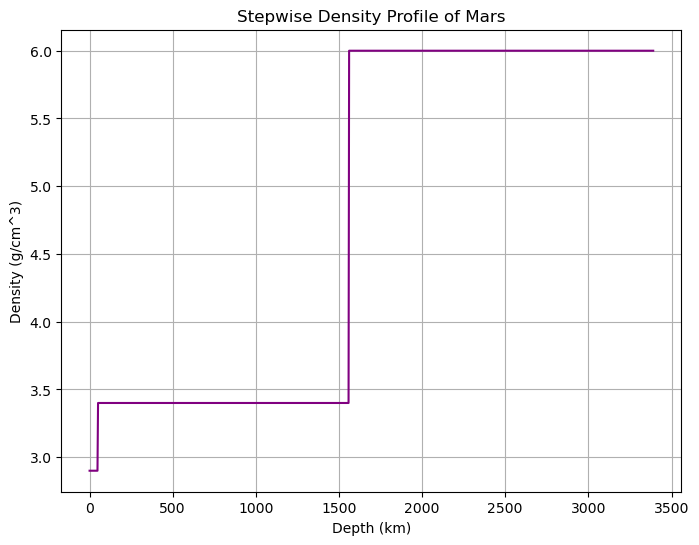

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the stepwise functions for Vp based on depth ranges
def Vp(depth):
    if 0 <= depth <= 50:
        return 4.25  # Crust value
    elif 50 < depth <= 1560:
        return 5  # Mantle value
    elif 1560 < depth <= 3390:
        return 6  # Core value
    else:
        return np.nan  # Outside known depth ranges

    # Stepwise function for Vs based on depth ranges
def Vs(depth):
    if 0 <= depth <= 50:
        return 2.5  # Crust value
    elif 50 < depth <= 1560:
        return 4  # Mantle value
    elif 1560 < depth <= 3390:
        return np.nan  # No value for the core in this case
    else:
        return np.nan  # Outside known depth ranges

    # Stepwise function for density based on depth ranges
def density(depth):
    if 0 <= depth <= 50:
        return 2.9  # Crust value
    elif 50 < depth <= 1560:
        return 3.4  # Mantle value
    elif 1560 < depth <= 3390:
        return 6  # Core value
    else:
        return np.nan  # Outside known depth ranges

# Generate depth values
depths = np.linspace(1e-5, 3390, 1000)  # Depth from 0 to 3390 km

# Calculate Vp values at each depth using the stepwise function
Vp_values = [Vp(depth) for depth in depths]
Vs_values = [Vs(depth) for depth in depths]
density_values = [density(depth) for depth in depths]

plt.figure(figsize=(8, 6))
plt.plot(depths, Vp_values, color='blue', label='Vp')
plt.plot(depths, Vs_values, color='green', label='Vs')
plt.xlabel('Depth (km)')
plt.ylabel('Velocity (km/s)')
plt.title('Stepwise Vp and Vs Profile of Mars')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(depths, density_values, color='purple')
plt.xlabel('Depth (km)')
plt.ylabel('Density (g/cm^3)')
plt.title('Stepwise Density Profile of Mars')
plt.grid(True)
plt.show()

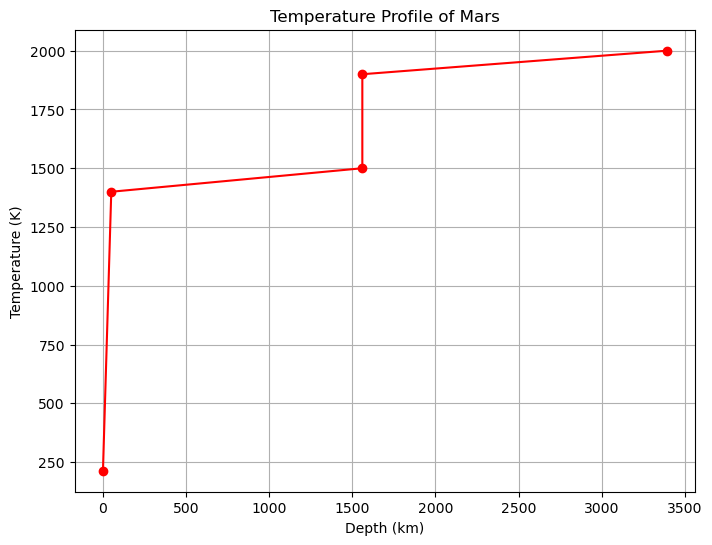

In [14]:
depth = [layer['Depth (km)'] for layer in layer_data_mars]
temperatures = [layer['Temperature (K)'] for layer in layer_data_mars]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(depth, temperatures, marker='o', linestyle='-', color='r')
ax.set_xlabel('Depth (km)')
ax.set_ylabel('Temperature (K)')
ax.set_title('Temperature Profile of Mars')

plt.grid(True)
plt.show()


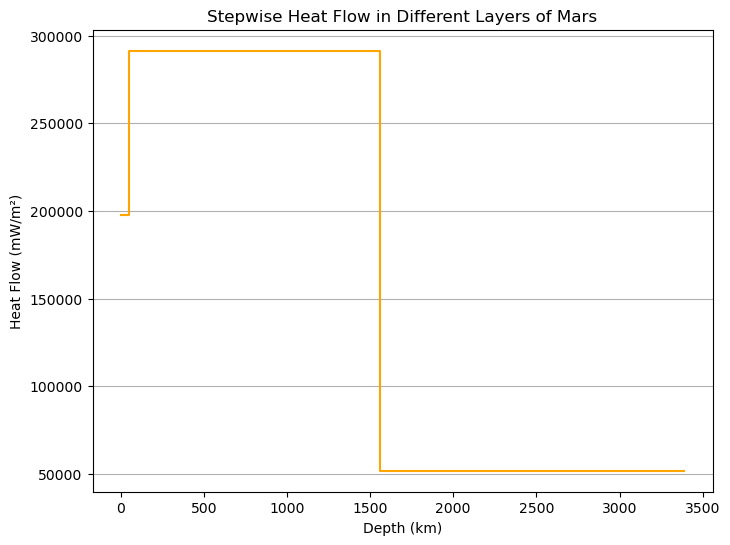

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Given thermal conductivity and thermal gradient for each layer
thermal_conductivities = [158.2, 96.5, 56.7]  # Thermal conductivity in W/m/K
thermal_gradients = [25, 2, 0.5]  # Thermal gradient in K/km

# Depth ranges for each layer (in km)
layer_depths = [1e-5, 50, 1560, 3390]  # Depth boundaries for layers

# Calculate heat flow for each layer
heat_flows = []
depths = []
for i in range(len(layer_depths) - 1):
    depth_diff = layer_depths[i + 1] - layer_depths[i]  # Depth difference in km
    k = thermal_conductivities[i]
    gradient = thermal_gradients[i] / 1000  # Convert to K/m
    heat_flow = k * gradient * depth_diff * 1000  # Convert km to m
    heat_flows.append(heat_flow)
    depths.extend([layer_depths[i], layer_depths[i + 1]])

# Plotting the stepwise heat flow for each layer
layer_labels = ['Crust', 'Mantle', 'Core']
plt.figure(figsize=(8, 6))
plt.step(depths, np.repeat(heat_flows, 2), where='post', color='orange')
plt.xlabel('Depth (km)')
plt.ylabel('Heat Flow (mW/m²)')
plt.title('Stepwise Heat Flow in Different Layers of Mars')
plt.grid(axis='y')
plt.show()


/var/folders/d0/5qnqr6t14kn9m9cr20vf1txm0000gn/T/ipykernel_33695/1200380244.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='jet'), label='Heat Flow (W/m²)', orientation='vertical')


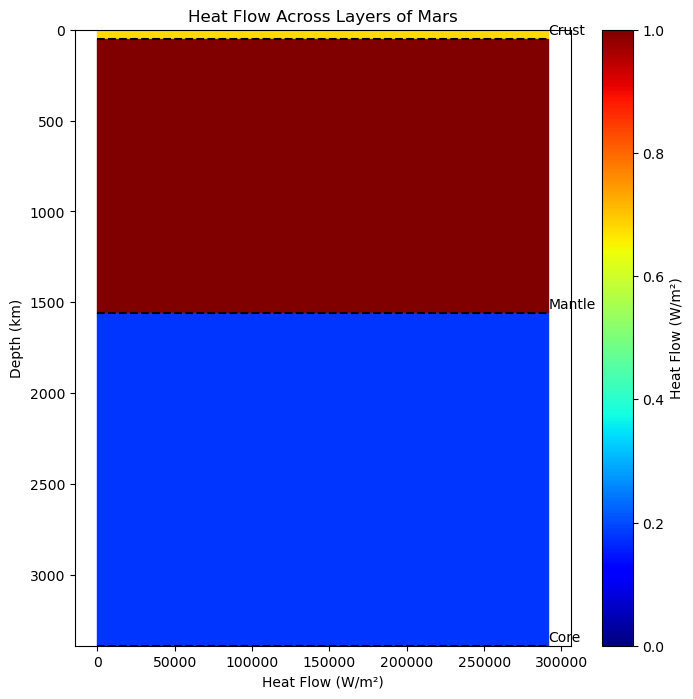

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Given thermal conductivity and thermal gradient for each layer
thermal_conductivities = [158.2, 96.5, 56.7]  # Thermal conductivity in W/m/K
thermal_gradients = [25, 2, 0.5]  # Thermal gradient in K/km

# Depth ranges for each layer (in km)
layer_depths = [1e-5, 50, 1560, 3390]  # Depth boundaries for layers
layer_names = ['Crust', 'Mantle', 'Core']

# Calculate heat flow for each layer
heat_flows = []
depths = []
for i in range(len(layer_depths) - 1):
    depth_diff = layer_depths[i + 1] - layer_depths[i]  # Depth difference in km
    k = thermal_conductivities[i]
    gradient = thermal_gradients[i] / 1000  # Convert to K/m
    heat_flow = k * gradient * depth_diff * 1000  # Convert km to m
    heat_flows.append(heat_flow)
    depths.extend([layer_depths[i], layer_depths[i + 1]])

# Creating the figure and plotting the heat flow with colored layers
plt.figure(figsize=(8, 8))

# Filling layers with color based on heat flow, rectangles span the entire width
for i in range(len(layer_depths) - 1):
    plt.fill_between([0, max(heat_flows)], [layer_depths[i], layer_depths[i]], [layer_depths[i + 1], layer_depths[i + 1]],
                     color=plt.cm.jet(heat_flows[i] / max(heat_flows)))

# Draw lines at layer boundaries
for i in range(len(layer_depths) - 1):
    plt.hlines(layer_depths[i + 1], 0, max(heat_flows), colors='black', linestyles='dashed')
    plt.text(max(heat_flows) + 10, layer_depths[i + 1] - 25, f'{layer_names[i]}', fontsize=10)

plt.xlabel('Heat Flow (W/m²)')
plt.ylabel('Depth (km)')
plt.title('Heat Flow Across Layers of Mars')

plt.grid(False)
plt.ylim(3390, 0)  # Invert y-axis to show depth increasing downwards
plt.colorbar(plt.cm.ScalarMappable(cmap='jet'), label='Heat Flow (W/m²)', orientation='vertical')

plt.show()


/var/folders/d0/5qnqr6t14kn9m9cr20vf1txm0000gn/T/ipykernel_33695/2074362441.py:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='jet'), label='Heat Flow (W/m²)')


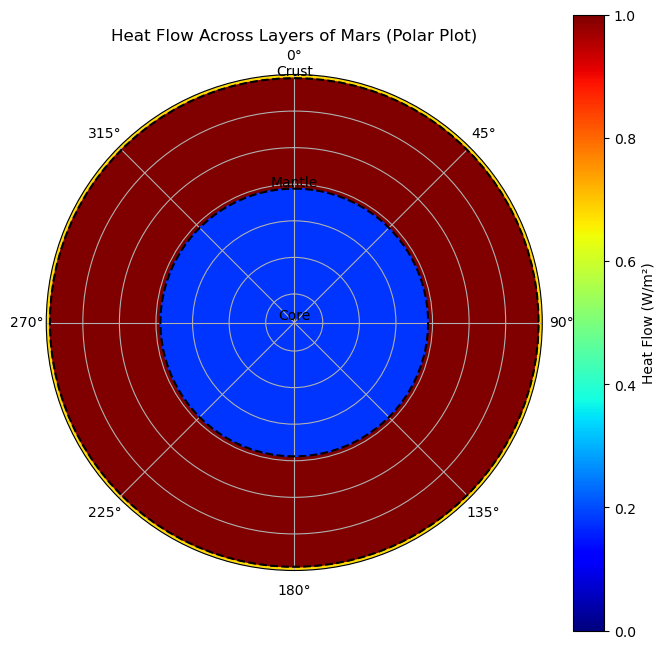

In [17]:
import matplotlib.pyplot as plt
import numpy as np

thermal_conductivities = [158.2, 96.5, 56.7]  # Thermal conductivity in W/m/K
thermal_gradients = [25, 2, 0.5]  # Thermal gradient in K/km

layer_depths = [0, 50, 1560, 3390]  # Depth boundaries for layers
layer_names = ['Crust', 'Mantle', 'Core']

heat_flows = []
depths = []
for i in range(len(layer_depths) - 1):
    depth_diff = layer_depths[i + 1] - layer_depths[i]  # Depth difference in km
    k = thermal_conductivities[i]
    gradient = thermal_gradients[i] / 1000  # Convert to K/m
    heat_flow = k * gradient * depth_diff * 1000  # Convert km to m
    heat_flows.append(heat_flow)
    depths.extend([layer_depths[i], layer_depths[i + 1]])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

for i in range(len(layer_depths) - 1):
    theta = np.linspace(0, 2 * np.pi, 100)
    r = np.ones(100) * layer_depths[i]
    ax.fill(theta, r, color=plt.cm.jet(heat_flows[i] / max(heat_flows)))

for i in range(len(layer_depths) - 1):
    theta = np.linspace(0, 2 * np.pi, 100)
    r = np.ones(100) * layer_depths[i + 1]
    ax.plot(theta, r, color='black', linestyle='--')
    ax.text(0, layer_depths[i + 1], layer_names[i], horizontalalignment='center', verticalalignment='bottom')

ax.set_title('Heat Flow Across Layers of Mars (Polar Plot)')
ax.set_theta_direction(-1)  # Reverse direction to start from the top
ax.set_theta_zero_location('N')  # Set zero to North
ax.set_ylim(3390, 0)  # Invert y-axis to show depth increasing outwards

ax.set_yticklabels([])  # Remove y-axis labels

plt.colorbar(plt.cm.ScalarMappable(cmap='jet'), label='Heat Flow (W/m²)')

plt.show()


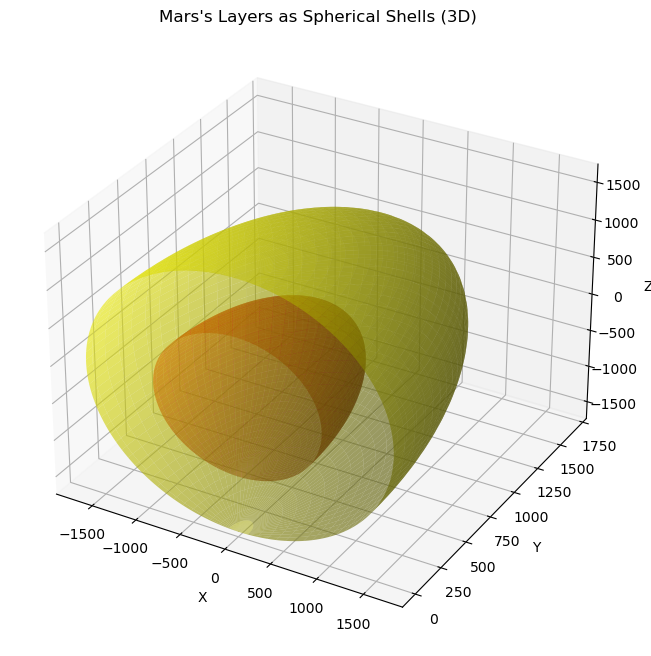

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

layers_mars = [
    ("Crust", (1e-5, 50), (500, 158.2), 25, 2.9),
    ("Mantle", (50, 1560), (1500, 96.5), 2, 3.4),
    ("Core", (1560, 3390), (1900, 56.7), 0.5, 6)
]

# Calculate heat flow for each layer
heat_flows_mars = []
for layer in layers_mars:
    depth_range = layer[1][1] - layer[1][0]
    temperature_gradient = layer[3]
    conductivity = layer[4]

    heat_flow = conductivity * temperature_gradient * depth_range
    heat_flows_mars.append(heat_flow)

heat_flows_mw_mars = [flow * 1000 for flow in heat_flows_mars]

layer_boundaries_mars = [layer[1][1] for layer in layers_mars]

# Recalculate layer radii based on depth ranges
layer_depths_mars = [layer[1][1] for layer in layers_mars]
layer_radii_mars = [(3390 - layer_boundaries_mars[i]) / 2 for i in range(len(layer_boundaries_mars))]

fig_mars = plt.figure(figsize=(8, 8))
ax_mars = fig_mars.add_subplot(111, projection='3d')

# Colors corresponding to heat flow values for layers
colors_mars = [
    (1, 1, 0),    # yellow - Crust
    (1, 0, 0),    # red - Mantle
    (0, 0, 1)     # blue - Core
]

# Plot spherical shells for each layer with assigned colors
for i, (radius, heat) in enumerate(zip(layer_radii_mars, heat_flows_mw_mars)):
    u = np.linspace(0, np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    u, v = np.meshgrid(u, v)

    # Parametric equations for a spherical shell
    x = radius * np.sin(v) * np.cos(u)
    y = radius * np.sin(v) * np.sin(u)
    z = -radius * np.cos(v)  # Invert Z-axis

    color = colors_mars[i % len(colors_mars)]  # Cycle through colors for different layers
    ax_mars.plot_surface(x, y, z, color=color, alpha=0.6)

ax_mars.set_title('Mars\'s Layers as Spherical Shells (3D)')
ax_mars.set_xlabel('X')
ax_mars.set_ylabel('Y')
ax_mars.set_zlabel('Z')

plt.show()


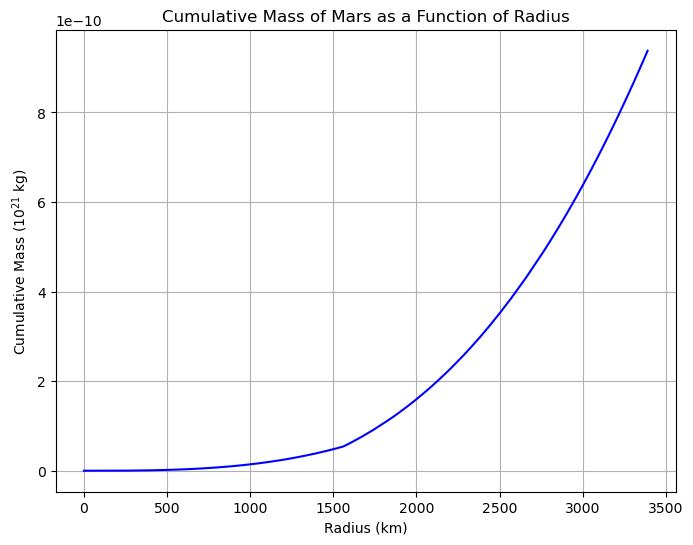

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectorized density function for Mars
def density(r):
    return np.where((r >= 0) & (r <= 50), 2.9, np.where((r > 50) & (r <= 1560), 3.4, 6))

# Define the function to calculate mass
def calculate_mass(density_func, radius):
    r_values = np.linspace(0, radius, 1000)  # Values of r from 0 to R of Mars
    mass = 4 * np.pi * np.trapz(density_func(r_values) * r_values**2, r_values)
    return mass

# Constants for Mars
radius_mars = 3390  # Radius of Mars in km

# Generate radial values
r_values = np.linspace(0, radius_mars, 1000)

# Calculate mass at each depth (radius)
mass_values = np.array([calculate_mass(density, radius) for radius in r_values])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(r_values, mass_values / 1e21, color='blue')
plt.xlabel('Radius (km)')
plt.ylabel('Cumulative Mass ($10^{21}$ kg)')
plt.title('Cumulative Mass of Mars as a Function of Radius')
plt.grid(True)
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectorized density function for Mars
def density(r):
    return np.where((r >= 0) & (r <= 50), 2.9, np.where((r > 50) & (r <= 1560), 3.4, 6))

# Define the function to calculate moment of inertia
def calculate_moment_of_inertia(density_func, radius):
    r_values = np.linspace(0, radius, 1000)  # Values of r from 0 to R of Mars
    inertia = (2/3) * 4 * np.pi * np.trapz(density_func(r_values) * r_values**4, r_values)
    return inertia

# Constants for Mars
radius_mars = 3390  # Radius of Mars in km

# Calculate moment of inertia and I/MR^2
moment_of_inertia = calculate_moment_of_inertia(density, radius_mars)
I_over_MR2 = moment_of_inertia / (radius_mars * 1000)**2 /1000**2 # Convert to meters for the denominator

# Print the results
print(f"Mars' moment of inertia: {moment_of_inertia:.2e} kg m^2")
print(f"I/MR^2 for Mars: {I_over_MR2:.6f}")


Mars' moment of inertia: 4.46e+18 kg m^2
I/MR^2 for Mars: 0.388157


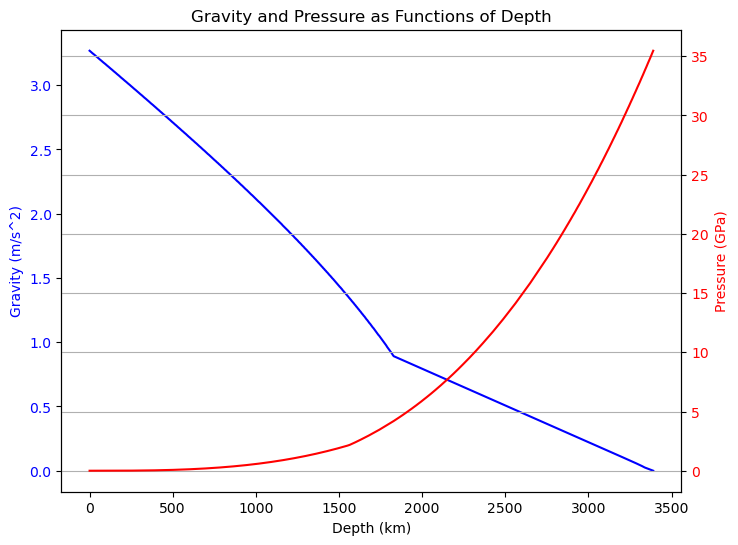

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Define the density function for Mars
def density(r):
    return np.where((r >= 0) & (r <= 50), 2.9, np.where((r > 50) & (r <= 1560), 3.4, 6))

# Constants for Mars
radius_mars = 3390  # Radius of Mars in km
G = 6.67430e-11  # Gravitational constant in m^3/kg/s^2
depths = np.linspace(1e-5, 3390, 1000)  # Depth from 0 to 3390 km

def calculate_gravity(density_func, depths, radius):
    gravity_values = []
    for depth in depths:
        r_values = np.linspace(0, depth, 1000)  # Values of r from 0 to current depth
        mass_at_depth = 4 * np.pi * np.trapz(density_func(r_values) * r_values**2, r_values)
        gravity = G * mass_at_depth / (depth * 1000)**2  # Calculate gravity at current depth
        gravity_values.append(gravity)
    return gravity_values

def calculate_pressure(gravity, density_func, depths):
    pressure_values = []
    for i, g in enumerate(gravity):
        r_values = np.linspace(1e-5, depths[i], 1000)  # Values of r from 0 to current depth
        rho_values = density_func(r_values)
        integrands = G * np.trapz(rho_values * r_values, dx=(r_values[1] - r_values[0])) / r_values**2
        pressure = np.trapz(integrands[::-1], dx=(r_values[1] - r_values[0]))
        pressure_values.append(pressure)
    return pressure_values

# Calculate gravity and pressure
gravity = calculate_gravity(density, depths, radius_mars)
pressure = calculate_pressure(gravity, density, depths)

scaled_pressure= [value/1e6 for value in pressure]
scaled_gravity= [value * 1e12*3/5 for value in gravity]

fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting gravity on the left y-axis
ax1.plot(depths[::-1], scaled_gravity, color='blue', label='Gravity')
ax1.set_xlabel('Depth (km)')
ax1.set_ylabel('Gravity (m/s^2)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for pressure on the right
ax2 = ax1.twinx()
ax2.plot(depths, scaled_pressure, color='red', label='Pressure')
ax2.set_ylabel('Pressure (GPa)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Gravity and Pressure as Functions of Depth')
plt.grid(True)
plt.show()

In [62]:
surface_gravity_mars = scaled_gravity[-1]  # Assuming the first value represents the surface gravity
print(f"Surface Gravity of Mars: {surface_gravity_mars:.2f} m/s²")

radius_1830_index = np.where(depths >= 1830)[0][0]  # Find index where depth is closest to 1830 km
pressure_at_1830 = scaled_pressure[radius_1830_index]
print(f"Pressure at the Core-Mantle Boundary (Radius = 1830 km): {pressure_at_1830:.2f} GPa")

center_pressure_mars = scaled_pressure[-1]  # Last value represents pressure at the center
print(f"Pressure at the Center of Mars: {center_pressure_mars:.2f} GPa")


Surface Gravity of Mars: 3.27 m/s²
Pressure at the Core-Mantle Boundary (Radius = 1830 km): 4.23 GPa
Pressure at the Center of Mars: 35.46 GPa
